This notebook is an initial exploration into figures we can generate using the footprint databases. Initial explorations began on 08/08/2017 and should be updated as new data become available.



In [9]:
library(dplyr)
library(RPostgreSQL)
library(ggpubr)
library(BiocParallel)
library(purrr)
library(VennDiagram)
library(reshape2)

## Figure 1: Venn Diagram Comparing Seed 16 to Seed 20

The idea here is to compare the two different seeds to one another by selecting 1 chromosome in 1 tissue type. 

In [2]:
# Step 1: Create a function that takes a data connection and fishes out info
findUniqueMotifs <- function(dbname){ 
    
    # Specify the connection
    db <- dbConnect(PostgreSQL(),
                    user = 'trena',
                    password = 'trena',
                    dbname = dbname,
                    host = 'localhost')
    #motifs <- dbGetQuery(db, "select distinct name from hits where loc like '%chrY%';")
    motifs <- dbGetQuery(db, "select distinct name from hits;")
    dbDisconnect(db)
    return(motifs)
}


In [4]:
# Define the footprint-reading function
# Create a function to read the files
readFootprintTable <- function(fp.path){
    tbl <- read.table(fp.path, sep = "\t", as.is = TRUE)
    colnames(tbl) <- c("chrom", "start", "end", "name", "score", "strand")
    return(tbl)
}

In [5]:
# New Steps 1/2: Simply find the footprints and compare between seeds
register(MulticoreParam(workers = 29, stop.on.error = TRUE, log = TRUE), default = TRUE)

lymph.16.paths <- list.files("./footprints/seed16/lymphoblast/hint/")
lymph.16.paths <- file.path("./footprints/seed16/lymphoblast/hint/",lymph.16.paths)

system.time(lymph.16.list <- bptry(bplapply(lymph.16.paths,
                              readFootprintTable
                              )))

############### LOG OUTPUT ###############
Task: 12
Node: 12
Timestamp: 2017-08-21 14:40:37
Success: TRUE
Task duration:
   user  system elapsed 
  0.320   0.016   0.335 
Memory used:
          used (Mb) gc trigger (Mb) max used (Mb)
Ncells  776517 41.5    1442291 77.1   950222 50.8
Vcells 1599294 12.3    2382972 18.2  1919141 14.7
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 11
Node: 11
Timestamp: 2017-08-21 14:40:39
Success: TRUE
Task duration:
   user  system elapsed 
  1.960   0.044   2.005 
Memory used:
          used (Mb) gc trigger (Mb) max used (Mb)
Ncells  952656 50.9    1770749 94.6  1033209 55.2
Vcells 3254415 24.9    5088160 38.9  3281900 25.1
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 7
Node: 7
Timestamp: 2017-08-21 14:40:40
Success: TRUE
Task duration:
   user  system elapsed 
  2.948   0.072   3.017 
Memory used:
          used (Mb) gc trigger  (Mb) max used (Mb)
Ncells 1208881 64.6    2164898 

   user  system elapsed 
 50.676   1.732  61.954 

In [6]:
lymph.20.paths <- list.files("./footprints/lymphoblast_hint_20/")
lymph.20.paths <- file.path("./footprints/lymphoblast_hint_20/",lymph.20.paths)

system.time(lymph.20.list <- bptry(bplapply(lymph.20.paths,
                              readFootprintTable
                              )))

############### LOG OUTPUT ###############
Task: 12
Node: 12
Timestamp: 2017-08-21 14:42:24
Success: TRUE
Task duration:
   user  system elapsed 
  1.256   0.072   1.330 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  21701363 1159.0   36236006 1935.3  22650098 1209.7
Vcells 209431899 1597.9  310061528 2365.6 210368416 1605.0
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-08-21 14:42:31
Success: TRUE
Task duration:
   user  system elapsed 
  1.728   0.124   1.857 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  21895510 1169.4   36236006 1935.3  22650098 1209.7
Vcells 211995882 1617.5  310061528 2365.6 212001811 1617.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-08-21 14:42:36
Success: TRUE
Task duration:
   user  system elapsed 
  8.040   0.432   8.483 
Memory used:
            used   (Mb) gc tri

   user  system elapsed 
114.332   4.312 160.149 

In [7]:
# Select only the first 3 columns and take the union of each
lymph.16.list <- bplapply(lymph.16.list,select,1:3)
lymph.20.list <- bplapply(lymph.20.list,select,1:3)

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-08-21 14:45:35
Success: TRUE
Task duration:
   user  system elapsed 
  0.012   0.000   0.010 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  33758610 1803.0   52267848 2791.5  34040022 1818.0
Vcells 391384132 2986.1  643373021 4908.6 396667605 3026.4
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-08-21 14:45:51
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.009 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  33758575 1803.0   52267848 2791.5  34040022 1818.0
Vcells 393885212 3005.2  643373021 4908.6 396667605 3026.4
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 14:45:57
Success: TRUE
Task duration:
   user  system elapsed 
  0.012   0.000   0.010 
Memory used:
            used (Mb) gc trigger

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-08-21 14:48:49
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.007 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  23580675 1259.4   52267848 2791.5  34040022 1818.0
Vcells 286819198 2188.3  643373021 4908.6 434618221 3315.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-08-21 14:49:01
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.004   0.007 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  23580646 1259.4   52267848 2791.5  34040022 1818.0
Vcells 290033243 2212.8  643373021 4908.6 434618221 3315.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 14:49:07
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.004   0.008 
Memory used:
            used   (Mb) gc trigg

In [12]:
lymph.16 <- reduce(lymph.20.list, union)
lymph.20 <- reduce(lymph.16.list, union)

In [10]:
# Step 3: Compare them with a Venn diagram
area.1 <- nrow(lymph.16)
area.2 <- nrow(lymph.20)
area.3 <- nrow(intersect(lymph.20,lymph.16))

saveRDS(list(area.1 = area.1, area.2=area.2, area.3 = area.3), "./Fig_1_list.RDS")

png 
  2

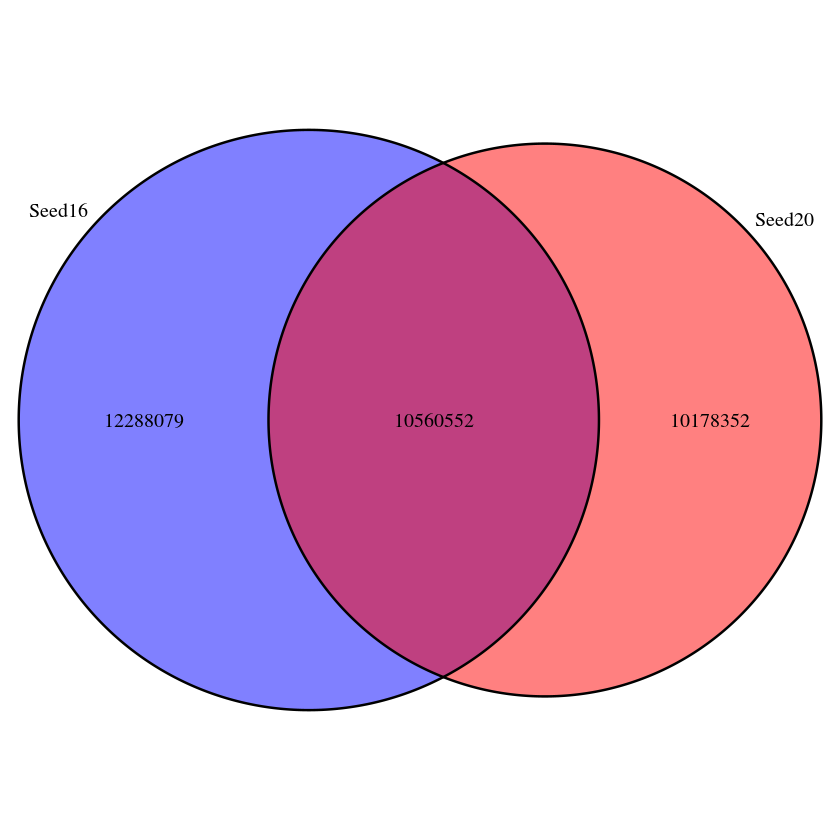

In [71]:
# Load the list
area.list <- readRDS("./Fig_1_list.RDS")

# Make a better looking venn diagram (save it to png)
png(filename = "Figure1.png")

venn.plot <- draw.pairwise.venn(area1 = area.list$area.1,
                                area2 = area.list$area.2,
                                cross.area = area.list$area.3,
                                category = c("Seed16","Seed20"),
                                fill = c("blue","red")#,
                                # ext.text = TRUE,
                                #cat.default.pos = "text" # Switch labels to inside??
                                )
dev.off()

venn.plot <- draw.pairwise.venn(area1 = area.list$area.1,
                                area2 = area.list$area.2,
                                cross.area = area.list$area.3,
                                category = c("Seed16","Seed20"),
                                fill = c("blue","red")#,
                                # ext.text = TRUE,
                                #cat.default.pos = "text" # Switch labels to inside??
                                )

## Figure 2: Table that counts the number of footprints in each tissue type, normalized by read depth

This will presumably call information from lots of databases

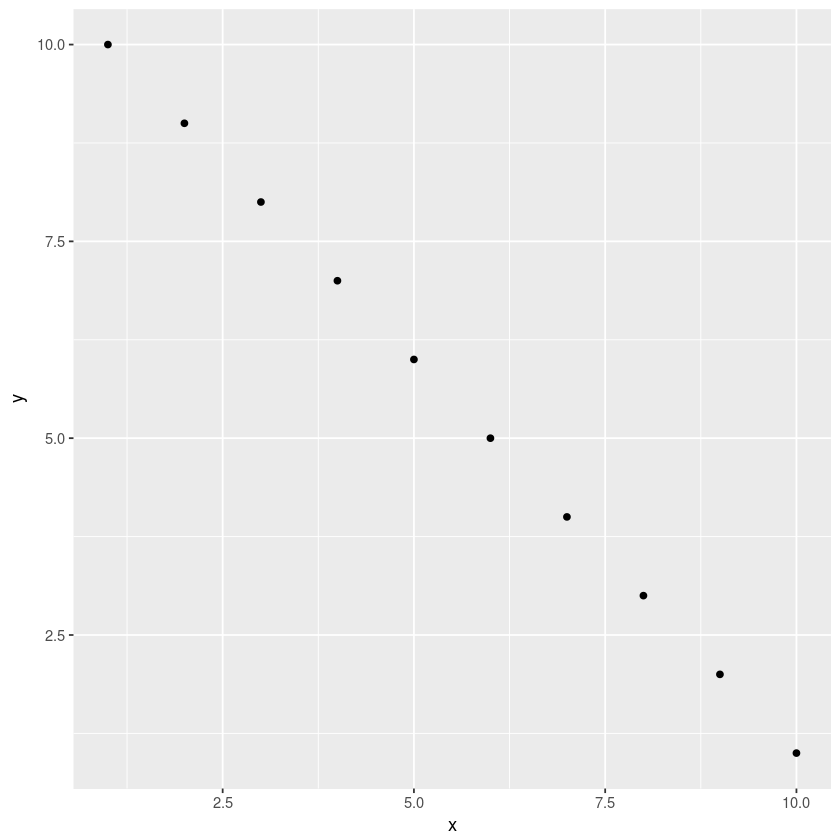

In [13]:
# Create a function that QUICKLY reads the number of lines in all the footprint files of
# a tissue type, then sums them and returns them
sumFootprints <- function(tissue){
    
    # Make tissue into a directory path
    
    # Read all the rows 
    blah <- system("wc -l ENCSR000ENK.bed", intern = TRUE)
    # Return the sum
}

ggplot(data.frame(x = 1:10, y = 10:1), aes(x=x,y=y)) + geom_point()

## Figure 3: Compare proximal promoter of genes in the brain that are either expressed or not expressed to show that the ENCODE data is good, despite being purported to be of good quality.

Not sure what to do with this right now; will have to figure this out

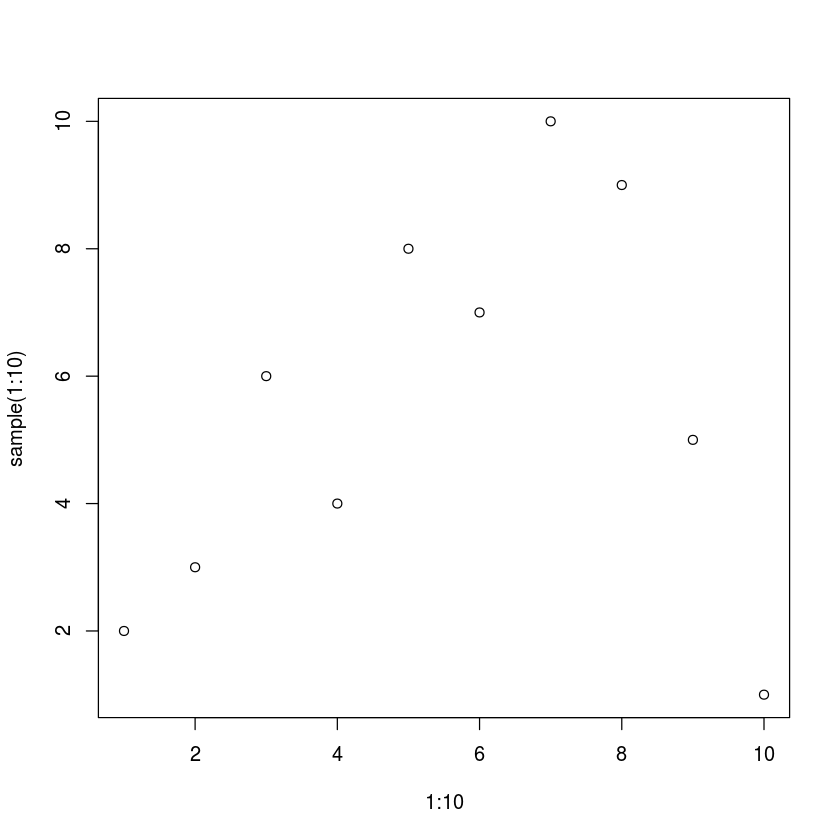

In [14]:
# More stuff in R

plot(1:10,sample(1:10))

## Figure 4: Table showing the number of footprints in each database (also functions as a list of all completed databases).

This is a way of grabbing the approximate number of rows; it's probably sufficiently close and it's super fast, as opposed to getting the exact count. For now, I'll make a bar chart with a table integrated into it.



In [15]:
# Function for finding # rows in the hits table given a db name
findApproxHits <- function(dbname){
    
    # Specify the connection
    db <- dbConnect(PostgreSQL(),
                    user = 'trena',
                    password = 'trena',
                    dbname = dbname,
                    host = 'localhost')
    numHits <- dbGetQuery(db, "select reltuples from pg_class where relname = 'hits'")[1,1]
    dbDisconnect(db)
    return(numHits)
}

In [16]:
db.list <- c("adrenal_gland_hint_20",
             "adrenal_gland_wellington_20",
             "bone_element_wellington_20",
             "bone_element_hint_20",
             "brain_hint_16",
             "brain_wellington_16",
             "brain_hint_20",
             "brain_wellington_20",
             "bronchus_wellington_20",
             "bronchus_hint_20",
             "esophagus_wellington_20",
             "esophagus_hint_20",
             "extraembryonic_structure_hint_20",
             "extraembryonic_structure_wellington_20",
             "eye_wellington_20",
             "eye_hint_20",
             "gonad_wellington_20",
             "gonad_hint_20",
             "heart_wellington_20",
             "heart_hint_20",
             "kidney_hint_20",
             "kidney_wellington_20",
             "large_intestine_hint_20",
             "large_intestine_wellington_20",
             "liver_hint_20",
             "liver_wellington_20",
             "lung_hint_20",
             "lung_wellington_20",
             "lymphatic_vessel_hint_20",
             "lymphatic_vessel_wellington_20",
             "lymphoblast_wellington_20",
             "lymphoblast_hint_20",
             "lymphoblast_hint_16",
             "lymphoblast_wellington_16",
             "mammary_gland_hint_20",
             "mammary_gland_wellington_20",
             "mouth_hint_20",
             "mouth_wellington_20",
             "muscle_organ_hint_20",
             "muscle_organ_wellington_20",
             "pancreas_hint_20",
             "pancreas_wellington_20",
             "prostate_gland_hint_20",
             "prostate_gland_wellington_20",
             "skin_wellington_20",
             "skin_hint_20",
             "skin_wellington_16",
             "skin_hint_16",
             "spinal_cord_hint_20",
             "spinal_cord_wellington_20",
             "stomach_hint_20",
             "stomach_wellington_20",
             "thyroid_gland_hint_20",
             "thyroid_gland_wellington_20",
             "tongue_hint_20",
             "tongue_wellington_20",
             "urinary_bladder_hint_20",
             "urinary_bladder_wellington_20"             
            )
# Note: could parallelize via BiocParallel if needed, but I doubt it is
hits.list <- sapply(db.list, findApproxHits)
hits.table <- data_frame(Name = names(hits.list),
                         Hits = hits.list, #format(hits.list,scientific = TRUE, digits = 3),
                         Hits.thousand = hits.list/1000,
                         Hits.million = hits.list/1e6,
                         Tissue = gsub("(.*)_(hint|wellington).*","\\1",Name),
                         Method = gsub(".*_(hint|wellington).*","\\1",Name)
                        )
hits.table <- hits.table %>% arrange(Method,Tissue, Hits)

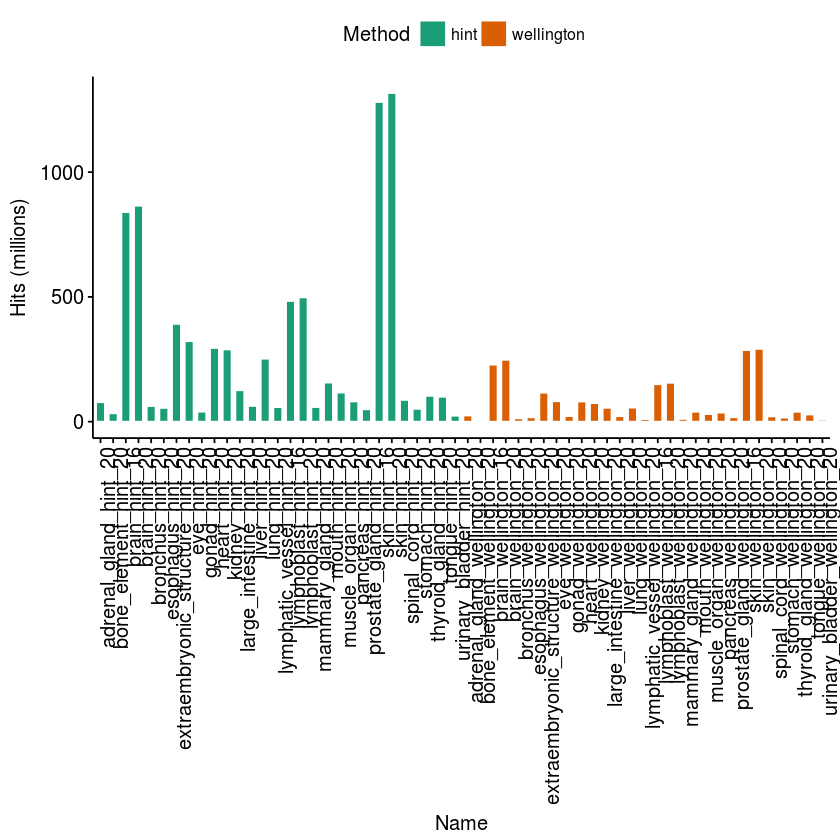

In [17]:
# Nice plotting; see http://www.sthda.com/english/wiki/ggplot2-easy-way-to-mix-multiple-graphs-on-the-same-page
# Color palettes: https://cran.r-project.org/web/packages/ggsci/vignettes/ggsci.html
bp <- hits.table %>% ggbarplot(x = "Name",
                               y = "Hits.million",
                               ylab = "Hits (millions)",
                               color = "white",
                               palette = "Dark2",
                               fill = "Method",
                               x.text.angle = 90#,
                               #sort.val = "asc"
                              )
tbl <- hits.table %>% select(Name, Hits) %>% 
        arrange(desc(Hits)) %>%
        ggtexttable(rows = NULL,
                    theme = ttheme("mViolet")
                    )
bp

In [43]:
# Two separate graphs
big.tissues <- hits.table %>% filter(Tissue %in% c("skin","brain","lymphoblast"), Method == "hint")
small.tissues <- hits.table %>% setdiff(big.tissues) %>% filter(Method == "hint")

bp.big <- big.tissues %>% ggbarplot(x = "Tissue",
                                    y = "Hits.million",
                                    ylab = "Hits (millions)",
                                    color = "white",
                                    palette = "Dark2",
                                    fill = "Method",
                                    x.text.angle = 90,
                                    #sort.val = "asc"
                                    )
bp.small <- small.tissues %>% ggbarplot(x = "Tissue",
                                        y = "Hits.million",
                                        ylab = "Hits (millions)",
                                        color = "white",
                                        palette = "Dark2",
                                        fill = "Method",
                                        x.text.angle = 90#,
                                        #sort.val = "asc"
                                        )

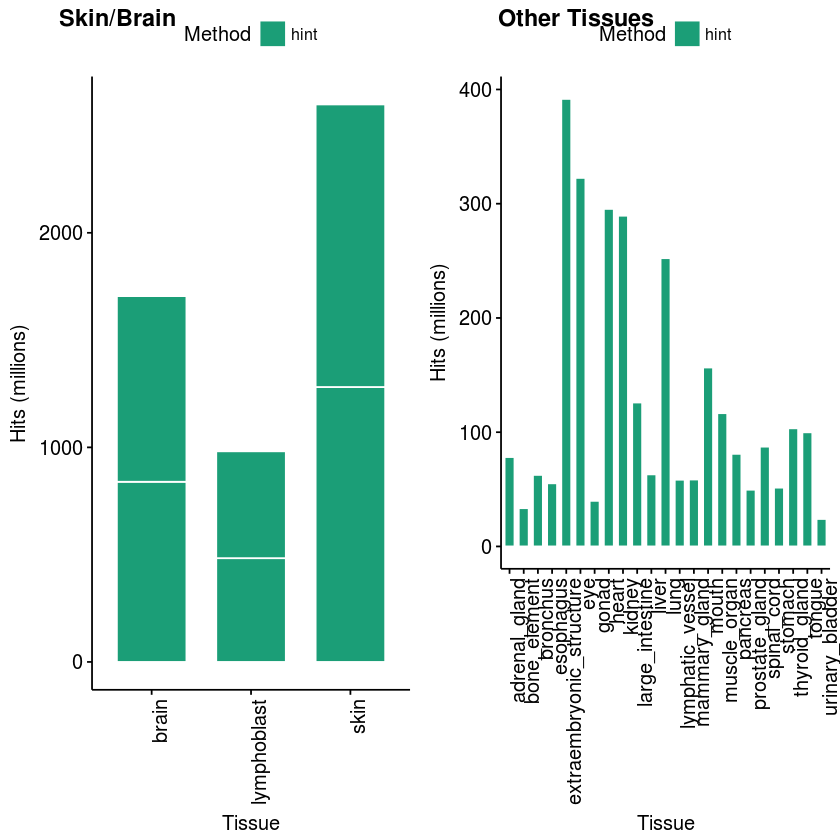

In [44]:
ggarrange(bp.big, bp.small, 
          labels = c("Skin/Brain", "Other Tissues"),
          ncol = 2, nrow = 1)

In [68]:
# Export the above plot for now

fig4 <- ggarrange(bp.big, bp.small, 
          labels = c("Skin/Brain", "Other Tissues"),
          ncol = 2, nrow = 1)
ggexport(fig4, filename = "Figure4.png")

file saved to Figure4.png


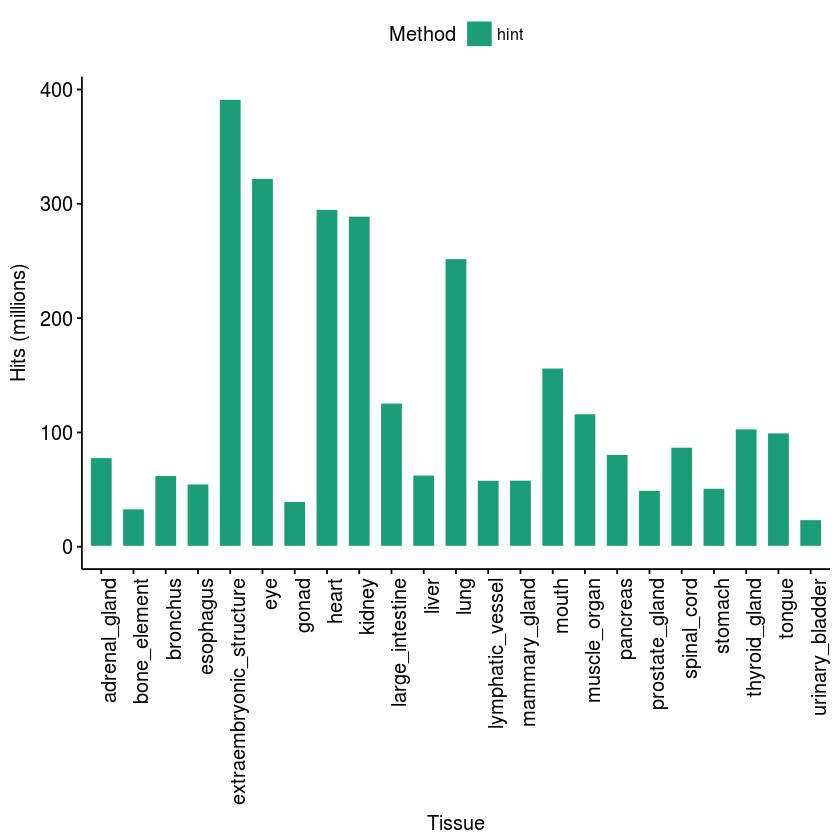

In [69]:
bp.small

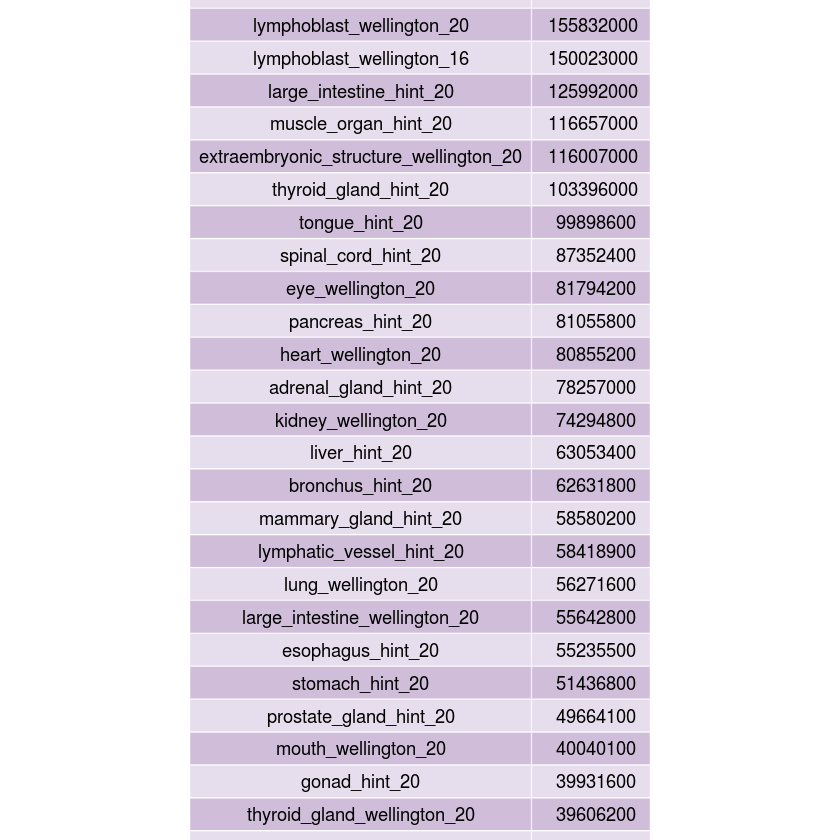

In [46]:
tbl

In [47]:
nrow(hits.table)

[1] 58

## Figure 5: Visualization of brain footprint growth, with total added footprints AND new footprints with each footprint file

In [23]:
# Time how long it takes to read ONE footprint file into a table:
system.time(fp1 <- read.table("footprints//brain_hint_20/ENCSR000DBW.bed", sep="\t", as.is=TRUE))

   user  system elapsed 
 10.200   0.164  10.376 

In [24]:
# Repeat function to read footprints (in case Fig.1 hasn't been run yet)
readFootprintTable <- function(fp.path){
    tbl <- read.table(fp.path, sep = "\t", as.is = TRUE)
    colnames(tbl) <- c("chrom", "start", "end", "name", "score", "strand")
    return(tbl)
}

In [25]:
# Using parallelization, read all the footprint files at once and time it
register(MulticoreParam(workers = 29, stop.on.error = TRUE, log = TRUE), default = TRUE)

all.paths <- list.files("./footprints/brain_hint_20/")
all.paths <- file.path("./footprints/brain_hint_20/",all.paths)

system.time(all.fp.list <- bptry(bplapply(all.paths,
                              readFootprintTable
                              )))


############### LOG OUTPUT ###############
Task: 4
Node: 4
Timestamp: 2017-08-21 14:59:03
Success: TRUE
Task duration:
   user  system elapsed 
  1.056   0.180   1.236 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   3923767  209.6   21408909 1143.4  52267848 2791.5
Vcells 238824595 1822.1  643373021 4908.6 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 14:59:06
Success: TRUE
Task duration:
   user  system elapsed 
  1.892   0.396   2.292 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   4290107  229.2   17127127  914.7  52267848 2791.5
Vcells 242147907 1847.5  643373021 4908.6 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 8
Node: 8
Timestamp: 2017-08-21 14:59:08
Success: TRUE
Task duration:
   user  system elapsed 
  3.896   0.828   4.724 
Memory used:
            used   (Mb) gc trigg

############### LOG OUTPUT ###############
Task: 22
Node: 22
Timestamp: 2017-08-21 15:00:40
Success: TRUE
Task duration:
   user  system elapsed 
  6.856   1.224   8.080 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  36312574 1939.4   61886222 3305.1  52267848 2791.5
Vcells 552705823 4216.9  926633150 7069.7 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 23
Node: 23
Timestamp: 2017-08-21 15:00:48
Success: TRUE
Task duration:
   user  system elapsed 
  9.168   1.312  10.547 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  38077614 2033.6   61886222 3305.1  52267848 2791.5
Vcells 569595759 4345.7  926633150 7069.7 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 24
Node: 24
Timestamp: 2017-08-21 15:00:56
Success: TRUE
Task duration:
   user  system elapsed 
 22.500   2.292  24.856 
Memory used:
            used   (Mb) gc

   user  system elapsed 
152.352  12.912 184.606 

In [26]:
class(all.fp.list)

[1] "list"

In [27]:
# The object is quite large...
object.size(all.fp.list)/(1024^2)

5418.5 bytes

In [28]:
head(all.fp.list[[1]])

chrom,start,end,name,score,strand,NA
chr1,66103,66123,chr1:66103-66123,10,.,NA
chr1,66162,66174,chr1:66162-66174,35,.,NA
chr1,66172,66183,chr1:66172-66183,34,.,NA
chr1,66195,66211,chr1:66195-66211,50,.,NA
chr1,66215,66232,chr1:66215-66232,57,.,NA
chr1,66233,66252,chr1:66233-66252,45,.,NA


In [29]:
# Take the first 3 columns only
system.time(reduced.fp.list <- bplapply(all.fp.list,select,1:3))

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-08-21 15:04:15
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.000   0.005 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455463 2587.9   74303466 3968.3  52267848 2791.5
Vcells 674990278 5149.8 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-08-21 15:04:35
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.000   0.005 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455503 2587.9   74303466 3968.3  52267848 2791.5
Vcells 678232127 5174.6 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 15:04:47
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.000   0.005 
Memory used:
            used   (Mb) gc trigg

############### LOG OUTPUT ###############
Task: 22
Node: 22
Timestamp: 2017-08-21 15:07:25
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.006 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456204 2587.9   74303466 3968.3  52267848 2791.5
Vcells 743624224 5673.5 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 23
Node: 23
Timestamp: 2017-08-21 15:07:33
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.008 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456239 2587.9   74303466 3968.3  52267848 2791.5
Vcells 747556234 5703.5 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 24
Node: 24
Timestamp: 2017-08-21 15:07:41
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.006 
Memory used:
            used   (Mb) gc

   user  system elapsed 
257.416  21.620 394.251 

In [30]:
# Object is now much smaller
object.size(reduced.fp.list)/(1024^2)

774.1 bytes

In [31]:
# First easy statistic: how many rows are in each DF (how many FPs?)
total.fps.added <- unlist(lapply(reduced.fp.list,nrow))

In [32]:
# Addition: want these in size order, so do that:
my.order <- order(total.fps.added, decreasing=TRUE)

reduced.fp.list <- reduced.fp.list[my.order]

# Re-do the statistic
total.fps.added <- unlist(lapply(reduced.fp.list,nrow))
total.fps.added

[1] 3246144 2844199 2781802 2607424 2554678 2442669 2422651 2264222 2055198
[10] 1965971 1944207 1916970 1908625 1696582 1664324 1620888 1593480 1573398
[19] 1563716 1445364 1394970 1365399 1313358 1293220  953084  859228  832978
[28]  371609  232524

In [33]:
cumsum(total.fps.added)

[1]  3246144  6090343  8872145 11479569 14034247 16476916 18899567 21163789
 [9] 23218987 25184958 27129165 29046135 30954760 32651342 34315666 35936554
[17] 37530034 39103432 40667148 42112512 43507482 44872881 46186239 47479459
[25] 48432543 49291771 50124749 50496358 50728882

In [34]:
# Now we need to figure out how many unique rows we've added for each

# Step 1: Make a function that, given an index, combines all dfs up to that index
findUniqueRows <- function(idx, db.list) {
    
    # Create a sub-list 
    sub.df <- db.list[1:idx]
    
    # Take the union and find the rows
    nrow(reduce(sub.df,union))    
}

In [35]:
# Step 2: Run that function with a list of indices
system.time(total.unique.fps <- bplapply(1:length(reduced.fp.list),findUniqueRows,reduced.fp.list))

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-08-21 15:13:33
Success: TRUE
Task duration:
   user  system elapsed 
      0       0       0 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455873 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770885268 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-08-21 15:14:01
Success: TRUE
Task duration:
   user  system elapsed 
  5.292   0.816   6.108 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455904 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770885332 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 15:14:14
Success: TRUE
Task duration:
   user  system elapsed 
 13.668   0.980  14.650 
Memory used:
            used   (Mb) gc trigg

############### LOG OUTPUT ###############
Task: 21
Node: 21
Timestamp: 2017-08-21 15:20:07
Success: TRUE
Task duration:
   user  system elapsed 
345.628  84.764 430.428 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456425 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770886493 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 24
Node: 24
Timestamp: 2017-08-21 15:20:20
Success: TRUE
Task duration:
   user  system elapsed 
383.568  40.660 424.274 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456451 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770886551 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 22
Node: 22
Timestamp: 2017-08-21 15:20:44
Success: TRUE
Task duration:
   user  system elapsed 
371.616  89.248 460.917 
Memory used:
            used   (Mb) gc

   user  system elapsed 
394.128  47.584 935.592 

In [56]:
# Now combine the 2 into one figure

all.totals <- data_frame(Idx = 1:length(reduced.fp.list),
                         Total = cumsum(total.fps.added),
                         Unique = unlist(total.unique.fps),
                         Hits = total.fps.added
                        )

# First attempt: put them on the same plot
all.totals.long <- melt(all.totals,
                        id.vars = "Idx",
                        variable.name = "Sum.Method"
                       )
saveRDS(all.totals.long, "Fig_5.RDS")
head(all.totals.long)

Idx,Sum.Method,value
1,Total,3246144
2,Total,6090343
3,Total,8872145
4,Total,11479569
5,Total,14034247
6,Total,16476916


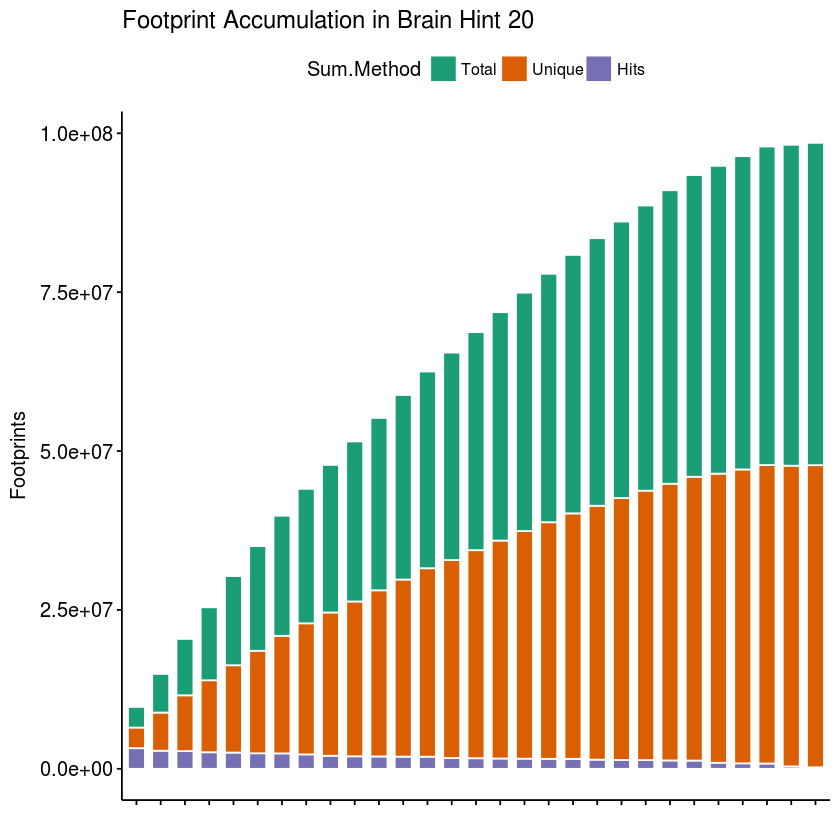

In [57]:
all.totals.long <- readRDS("./Fig_5.RDS")

ggbarplot(all.totals.long,
          x = "Idx",
          y = "value",
          xlab = "",
          ylab = "Footprints",
          color = "white",
          palette = "Dark2",
          fill = "Sum.Method",
          main = "Footprint Accumulation in Brain Hint 20"
         ) + rremove("x.text")

This looks good, but what about doing a bar plot with a line plot overlayed to show unique entries?

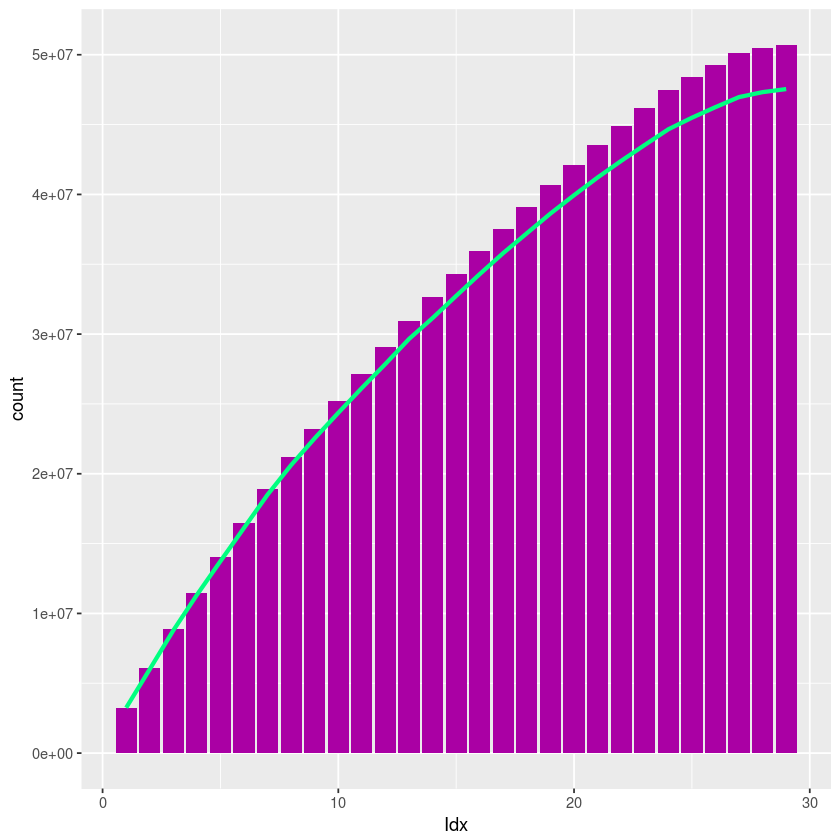

In [58]:
# Make a barplot and a line plot on top of one another
ggplot(all.totals) + 
   geom_bar(aes(x = Idx, weight = Total), fill = "#AA00A4") +
   geom_line(aes(x = Idx, y = Unique), color = "#00FF80", lwd = 1.2)

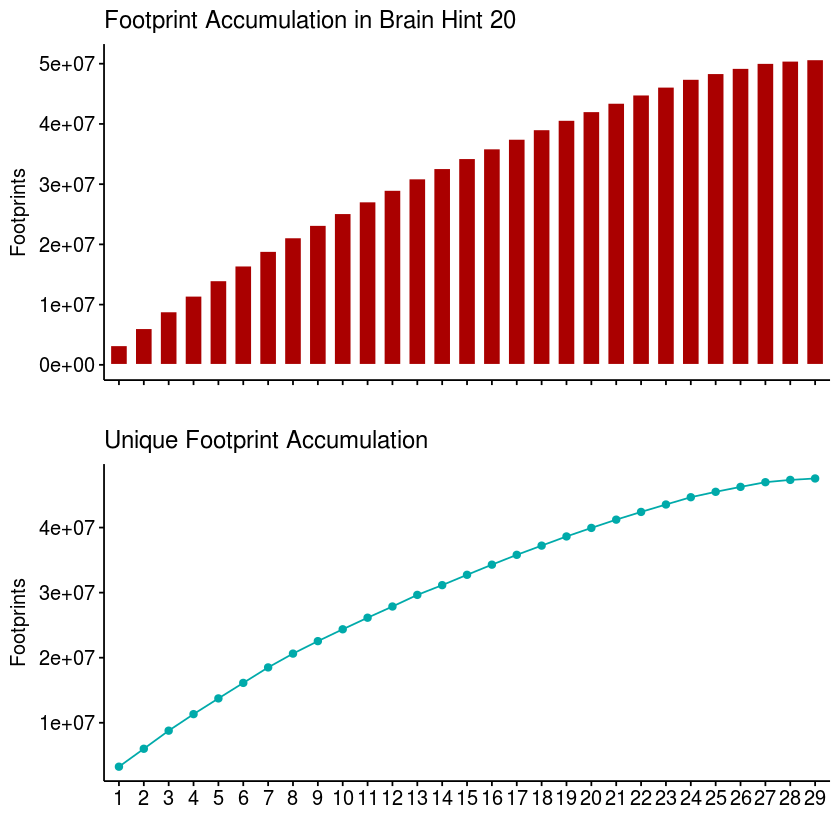

In [59]:
bp <- ggbarplot(all.totals,
          x = "Idx",
          y = "Total",
          xlab = "",
          ylab = "Footprints",
                color = "white",
                fill = "#AA0000",
          main = "Footprint Accumulation in Brain Hint 20"
         ) + rremove("x.text")

lp <- ggline(all.totals,
             x = "Idx",
             y = "Unique",
             color = "#00AAAA",
             xlab = "",
             ylab = "Footprints",
             main = "Unique Footprint Accumulation"
             )
ggarrange(bp, lp, nrow = 2, align = "v")



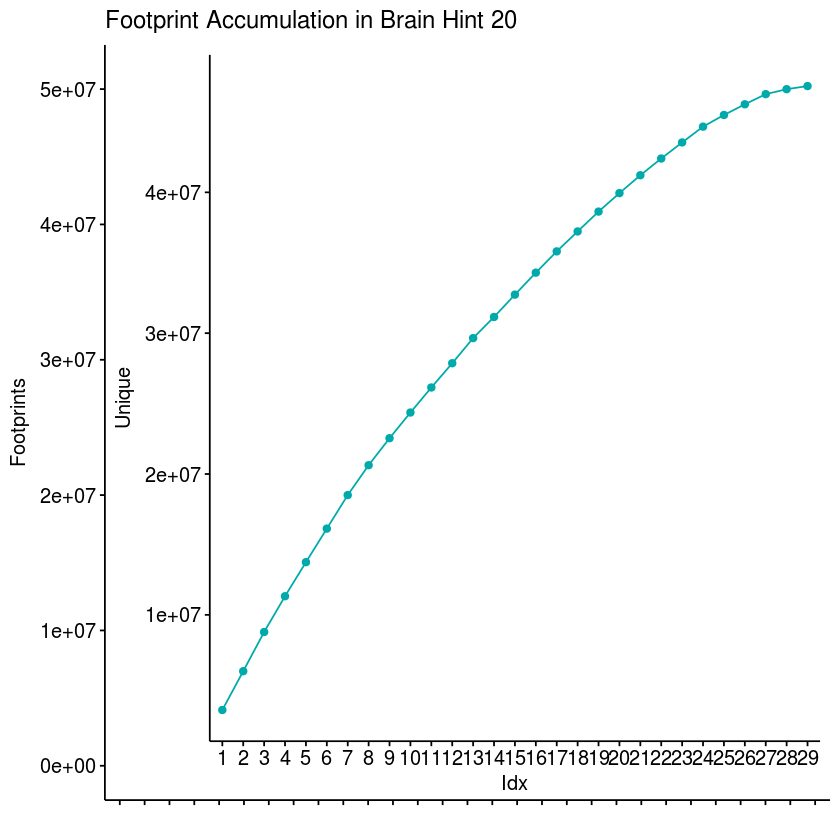

In [60]:
lp <- ggline(all.totals,
             x = "Idx",
             y = "Unique",
             color = "#00AAAA")
lp_grob <- ggplotGrob(lp)

bp + annotation_custom(grob = lp_grob)

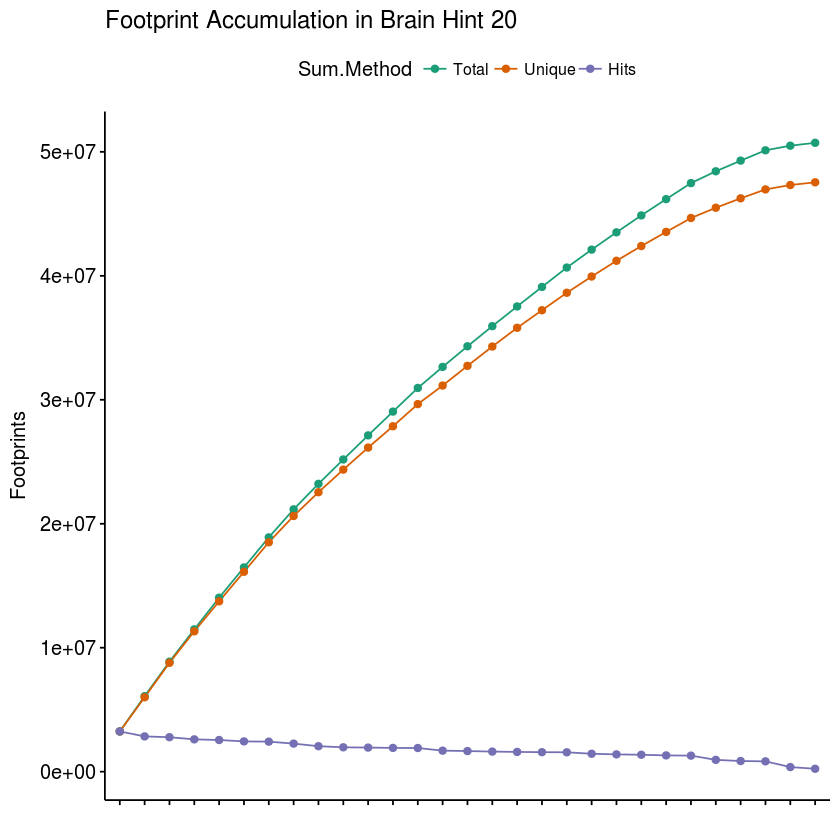

In [61]:
ggline(all.totals.long,
          x = "Idx",
          y = "value",
          xlab = "",
          ylab = "Footprints",
          color = "Sum.Method",
          palette = "Dark2",
          main = "Footprint Accumulation in Brain Hint 20"
         ) + rremove("x.text")

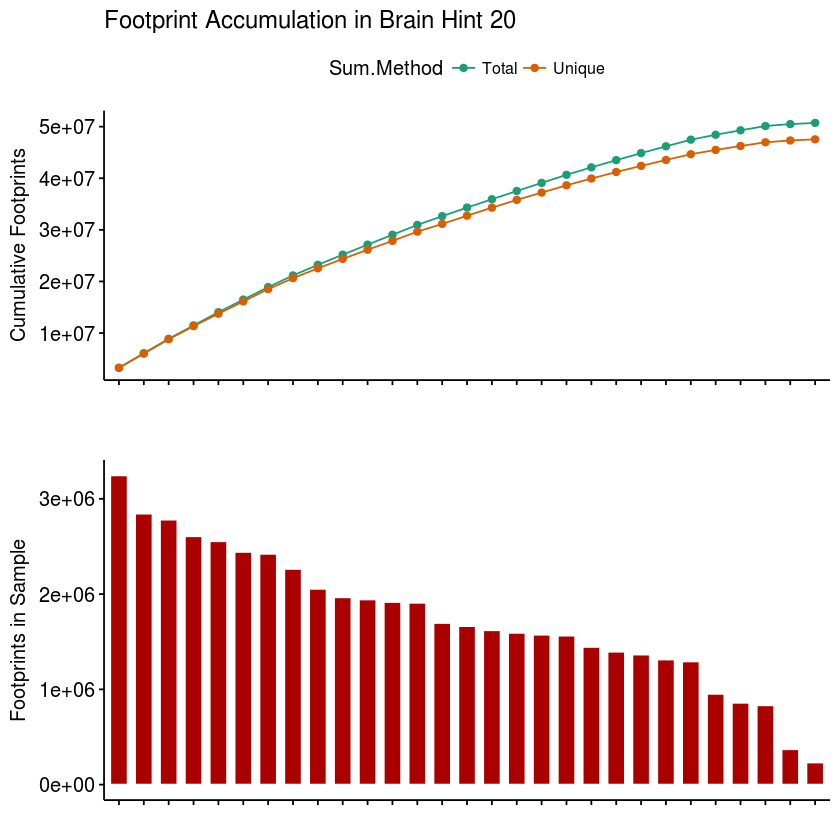

In [62]:
# Final idea: put total and unique on a line, put footprints on a bar below it

lp <- all.totals.long %>% filter(Sum.Method %in% c("Total","Unique")) %>%
   ggline(x = "Idx",
          y = "value",
          xlab = "",
          ylab = "Cumulative Footprints",
          color = "Sum.Method",
          palette = "Dark2",
          main = "Footprint Accumulation in Brain Hint 20"
         ) + rremove("x.text")

bp <- all.totals.long %>% filter(Sum.Method == "Hits") %>%
   ggbarplot(x = "Idx",
             y = "value",
             xlab = "",
             ylab = "Footprints in Sample",
             color = "white",
             fill = "#AA0000",
             main = ""
            ) + rremove("x.text")

ggarrange(lp, bp, nrow = 2, align = "v")

In [67]:
fig5 <- ggarrange(lp, bp, nrow = 2, align = "v")
ggexport(fig5, filename = "Figure5.png")


file saved to Figure5.png
